In [26]:
# import des librairies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap
import calendar
from dbfread import DBF

In [2]:
# lien du premier dataset et sauvegarde du fichier
!pwd
!wget -N "https://www.dropbox.com/sh/zgxpx85i6dvfuk9/AAAXEh50WXOu3KtvwOKTy0OIa/Donn%C3%A9es%20Chimay?dl=0&preview=DB+-+Chimay+Centre+-+OpenData+-+v1.0+-+20210202-18h25.csv"

/home/ousmane/Hackathon/HackYourCity-Chimay-Ch4
--2021-02-05 10:19:30--  https://www.dropbox.com/sh/zgxpx85i6dvfuk9/AAAXEh50WXOu3KtvwOKTy0OIa/Donn%C3%A9es%20Chimay?dl=0&preview=DB+-+Chimay+Centre+-+OpenData+-+v1.0+-+20210202-18h25.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/zgxpx85i6dvfuk9/AAAXEh50WXOu3KtvwOKTy0OIa/Donn%C3%A9es%20Chimay [following]
--2021-02-05 10:19:31--  https://www.dropbox.com/sh/raw/zgxpx85i6dvfuk9/AAAXEh50WXOu3KtvwOKTy0OIa/Donn%C3%A9es%20Chimay
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc68ba3656a6f6ad78080c1f3662.dl.dropboxusercontent.com/zip_download_get/AruVQ1ryUHFJIDyU09LlBS9TI0TfssPZljU3kRYRghWd9drj6lc05MkTFi6K9-TpUgzMnUtEaqP7KidaSLtKmcrkaeXvjDgbNG_owc_yzJVEaw [following]
--2

In [3]:
# import du premier dataset
df = pd.read_csv("Données Chimay?dl=0&preview=DB+-+Chimay+Centre+-+OpenData+-+v1.0+-+20210202-18h25.csv", encoding= 'unicode_escape')

In [4]:
# import le deuxieme dataset
df2 = pd.read_csv("commerces/commerces.csv", sep=',')

In [5]:
# set des display options
pd.options.display.max_columns = 20
pd.options.display.max_rows = None

In [6]:
# affichage du premier dataset
df.sample(5)

,PK,post_title,post_slug,directory_category,post_content,location_address__street,location_address__zip,location_address__city,location_address__address,location_address__lat,location_address__lng,directory_tag,field_email,field_phone,field_social_accounts__facebook,field_website,directory_photos
106,3494,Optique Poucet-Cuche,optique-poucet-cuche,optique,Description Ã venir,"Rue d'Austravent, 12",6460.0,CHIMAY,"Rue d'Austravent, 12, 6460 CHIMAY",50.084453,4.266021,NaN,NaN,060/21 28 21,NaN,NaN,httpchimaycommerce.wpengine.comwp-contentuploa...
163,3713,Plaine des Ormeaux,plaine-des-ormeaux,moto-bienvenue;parkings;patrimoine-naturel;vel...,La Plaine des Ormeaux est situÃ©e Ã l'endroit...,plaine des ormeaux,6460.0,Chimay,"Rue des Ormeaux 27, 6460 Chimay, Belgique",50.047948,4.317417,NaN,NaN,NaN,NaN,NaN,NaN
33,3316,Chimay Cordo,chimay-cordo,commerce,Description Ã venir,"Place Froissart, 26",6460.0,CHIMAY,"Place Froissart, 26, 6460 CHIMAY",50.047535,4.313840,NaN,serrureriedechimay@gmail.com,060/21 36 38 ou 0475/54 09 76,https://www.facebook.com/serruriechimay,NaN,httpchimaycommerce.wpengine.comwp-contentuploa...
154,3693,Info Tourisme,info-tourisme,information-touristique;souvenirs;toilettes-pu...,Point d'accueil touristique,Rue de Noailles 6,6460.0,Chimay,"Rue de Noailles 6, 6460 Chimay, Belgique",50.049444,4.317226,acces-pmr,NaN,60211846,NaN,https://visitchimay.be,tourisme.jpeg
69,3403,La Charlotte,la-charlotte,restaurant-cafe-snack,Description Ã venir,Place Froissart 8,6460.0,CHIMAY,"Place Froissart 8, 6460 CHIMAY",50.047527,4.314809,NaN,vincentgilbert@hotmail.be,060/21 21 00,https://www.facebook.com/lacharlotte.chimay,NaN,httpchimaycommerce.wpengine.comwp-contentuploa...


In [7]:
# composition 
df.shape

(199, 17)

In [8]:
# affichage du deuxieme dataset
df2.sample(10)

,directory_category,entity_featured__value,post_content,location_address__street,location_address__street2,location_address__city,location_address__country,location_address__address,location_address__lat,location_address__term_id,...,field_opening_hours,field_phone,field_price_range,field_social_accounts__facebook,field_social_accounts__instagram,field_social_accounts__linkedin,field_social_accounts__twitter,field_social_accounts__youtube,field_videos,field_website
209,hebergement,NaN,Description à venir,Rue de Forges 10,NaN,CHIMAY,BE,"Rue de Forges 10, 6460 CHIMAY",50.045273,chimay,...,NaN,060/51 41 21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,artisan-createur,NaN,Description à venir,"Rue des Sarts, 250",NaN,FORGES,BE,"Rue des Sarts, 250, 6464 FORGES",50.027883,forges,...,NaN,060/21 14 57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,auto-moto,NaN,Description à venir,"Chée de Couvin, 96",NaN,CHIMAY,BE,"Chée de Couvin, 96, 6460 CHIMAY",50.045348,chimay,...,NaN,060/21 13 92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,restaurant-cafe-snack,NaN,Description à venir,"Rue du Lac, 35",NaN,VIRELLES,BE,"Rue du Lac, 35, 6461 VIRELLES",50.066675,virelles,...,NaN,060/21 10 71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,loisirs;sport,NaN,NaN,Avenue du Chalon 1b,NaN,Chimay,BE,"Avenue du Châlon 1/B, 6460 Chimay, Belgique",50.048212,chimay,...,NaN,NaN,0|100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,auto-moto,NaN,Description à venir,"Zoning industriel,7",NaN,BAILEUX,BE,"Zoning industriel,7, 6465 BAILEUX",50.035664,baileux,...,NaN,060/21 04 45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.dealer.volvotrucks.be/guerin/about...
101,commerce,NaN,Description à venir,Chée de Couvin,NaN,CHIMAY,BE,"Chée de Couvin, 6460 CHIMAY",50.044320,chimay,...,NaN,060/21 42 31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,telephonie,NaN,Description à venir,"Grand-Place, 14/15",NaN,CHIMAY,BE,"Grand-Place, 14/15, 6460 CHIMAY",50.048905,chimay,...,NaN,060/21 35 11,NaN,https://www.facebook.com/bcwproximuschimay,NaN,NaN,NaN,NaN,NaN,NaN
63,coiffure,NaN,Description à venir,Rue maurice gauchez 7,NaN,CHIMAY,BE,"Rue maurice gauchez 7, 6460 CHIMAY",50.049034,chimay,...,NaN,060/21 32 66,0|100,https://www.facebook.com/CoiffB-22128276141191...,NaN,NaN,NaN,NaN,NaN,NaN
138,moto-welcomed;restaurant-cafe-snack,NaN,Description à venir,"Place Léopold, 3",NaN,CHIMAY,BE,"Place Léopold, 3, 6460 CHIMAY",50.047630,chimay,...,NaN,060/21 13 53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# print options
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   directory_category                266 non-null    object 
 1   entity_featured__value            0 non-null      float64
 2   post_content                      222 non-null    object 
 3   location_address__street          268 non-null    object 
 4   location_address__street2         0 non-null      float64
 5   location_address__city            266 non-null    object 
 6   location_address__country         266 non-null    object 
 7   location_address__address         266 non-null    object 
 8   location_address__lat             269 non-null    float64
 9   location_address__term_id         267 non-null    object 
 10  location_address__lng             269 non-null    float64
 11  location_address__zip             268 non-null    float64
 12  location

In [10]:
# shape
df2.shape

(269, 29)

In [11]:
# regarder les donnees manquantes
df2.isna().sum()

directory_category                    3
entity_featured__value              269
post_content                         47
location_address__street              1
location_address__street2           269
location_address__city                3
location_address__country             3
location_address__address             3
location_address__lat                 0
location_address__term_id             2
location_address__lng                 0
location_address__zip                 1
location_address__province            3
location_address__timezone            3
directory_photos                     90
voting_rating                       269
directory_tag                       260
post_title                            0
voting_updown                       269
field_opening_hours                 267
field_phone                          52
field_price_range                   171
field_social_accounts__facebook     149
field_social_accounts__instagram    269
field_social_accounts__linkedin     269


In [12]:
# mise en liste des colonnes inutils a supprimer
list = ["field_social_accounts__instagram", "field_social_accounts__linkedin", "field_social_accounts__twitter", "field_social_accounts__youtube", "field_videos", "voting_updown", "voting_rating", "directory_tag", "location_address__street2", "entity_featured__value", "field_opening_hours", "location_address__country", "location_address__province", "location_address__timezone", "field_price_range", "directory_photos"]

In [13]:
# suppression
df2.drop(list, axis=1, inplace=True)

In [14]:
# nouveau shape
df2.shape

(269, 13)

In [15]:
# correction des valeurs manquantes
df2['post_content'].fillna("Description à venir", inplace=True)
df2['field_social_accounts__facebook'].fillna("A venir", inplace=True)
df2['field_website'].fillna("A venir", inplace=True)
df2['directory_category'].fillna("Autre", inplace=True)
df2['location_address__street'].fillna("Neant", inplace=True)
df2['location_address__city'].fillna("Chimay", inplace=True)
df2['location_address__address'].fillna(df2['location_address__city'], inplace=True)
df2['location_address__term_id'].fillna("chimay", inplace=True)
df2['location_address__zip'].fillna(6460.0, inplace=True)
df2['field_phone'].fillna(0, inplace=True)


In [16]:
# reglage de la police des valeurs
df2["location_address__city"] = df2["location_address__city"].str.lower()
df2["location_address__term_id"] = df2["location_address__term_id"].str.lower()
df2["directory_category"] = df2["directory_category"].str.lower()

In [17]:
# re-groupement des categories minoritaires sous "autre"

val = ['patrimoine-historique;portes-historiques', 'divers;wifi', 'patrimoine-historique', 'animation-musicale, artisan-createur', 'animation-musicale;attraction;contes-et-legendes;fantomes;tournages;monuments-et-statues;moto-bienvenue;parkings;patrimoine-historique;point-de-vue;shooting-place;toilettes-publiques;velo-bienvenue', 'patrimoine-historique;portes-historiques;vestiges-medievaux', 'monuments-et-statues;patrimoine-historique', 'animation-musicale', 'artisan-createur', 'moto-bienvenue;parkings;velo-bienvenue', 'information-touristique;souvenirs;toilettes-publiques;velo-bienvenue', 'attraction;contes-et-legendes;devises-et-inscriptions;fantomes;tournages;patrimoine-historique;puzzle;toilettes-publiques', 'art-artisanat;culture;meeting-space;parkings;wifi', 'patrimoine-naturel;point-de-vue;portes-historiques;vestiges-medievaux;pic-nic', 'contes-et-legendes;patrimoine-historique;point-de-vue;portes-historiques;vestiges-medievaux', 'devises-et-inscriptions;patrimoine-historique;point-de-vue;portes-historiques;shooting-place;vestiges-medievaux', 'moto-bienvenue;parkings', 'moto-bienvenue;parkings;patrimoine-naturel;velo-bienvenue;pic-nic', 'camping;zone-motorhome', 'contes-et-legendes;patrimoine-historique;point-de-vue;portes-historiques;vestiges-medievaux', 'patrimoine;point-de-vue', 'transports', 'animation-musicale;tournages;patrimoine-historique', 'commerce;construction-renovation', 'contes-et-legendes;parkings;patrimoine-historique;shooting-place;velo-bienvenue', 'moto-bienvenue;parkings;transports', 'attraction;contes-et-legendes;lieux-de-culte;tournages;patrimoine-historique', 'animation-musicale;attraction;contes-et-legendes;culture;devises-et-inscriptions;fantomes;tournages;loisirs;patrimoine-historique;point-de-vue;vestiges-medievaux', 'commerce-alimentaire;traiteur', 'librairie-papeterie', 'animation-musicale;lieux-de-culte;patrimoine', 'depart-de-balade;fantomes;loisirs;puzzle', 'telephonie', 'contes-et-legendes;devises-et-inscriptions;meeting-space;monuments-et-statues;patrimoine-historique;shooting-place;velo-bienvenue', 'contes-et-legendes;patrimoine-historique;vestiges-medievaux']

In [18]:
# boucle for pour remplacer les categories regroupees plus haut
for i in val:
    df2["directory_category"] = df2["directory_category"].replace(i, 'autre')

In [19]:
# regroupement en grande categorie
a = ["commerce", "commerce-alimentaire", "commerce-alimentaire", "commerce;velo-bienvenue","supermarche", "agence-de-voyage", "coiffure", "construction-renovation", "services",  "carburants", "informatique", "hebergement", "immobilier"]

b = ["autre", "description à venir", "optique"]

c = ["restaurant-cafe-snack", "moto-welcomed;restaurant-cafe-snack", "traiteur"]  


d = ["loisirs", "loisirs;sport", "esthetique", "jardins-et-fleurs", "auto-moto"]    

e = ["soins-de-sante", "centres-medicaux"] 

f = ["lieux-de-culte;patrimoine-historique",  "tournages;patrimoine-historique", "tournages;patrimoine-historique;point-de-vue;vestiges-medievaux", "art-artisanat;artisan-createur", "depart-de-balade;patrimoine-naturel;point-de-vue;sport;transports;velo-bienvenue;pic-nic",  "depart-de-balade;hiking;patrimoine-naturel" ]

g = ["bancontact;banque-et-assurance", "banque-et-assurance;banques", "banques", "banque-et-assurance"]             

In [20]:
# transformation des valeurs pour les autres categories
for i in a:
    df2["directory_category"] = df2["directory_category"].replace(i, 'Commerce et Service')
for i in b:
    df2["directory_category"] = df2["directory_category"].replace(i, 'Autre')
for i in c:
    df2["directory_category"] = df2["directory_category"].replace(i, 'Resto et Snack')
for i in d:
    df2["directory_category"] = df2["directory_category"].replace(i, 'Sports et Loisirs')
for i in e:
    df2["directory_category"] = df2["directory_category"].replace(i, 'Sante')
for i in f:
    df2["directory_category"] = df2["directory_category"].replace(i, 'Art et Lieux Historiques')
for i in g:
    df2["directory_category"] = df2["directory_category"].replace(i, 'Banque et Finance')

In [21]:
# check des nouvelles valeurs
df2["directory_category"].value_counts()

Commerce et Service         102
Resto et Snack               43
Autre                        39
Sports et Loisirs            33
Banque et Finance            17
Art et Lieux Historiques     13
textile                      10
Sante                         7
animaux                       5
Name: directory_category, dtype: int64

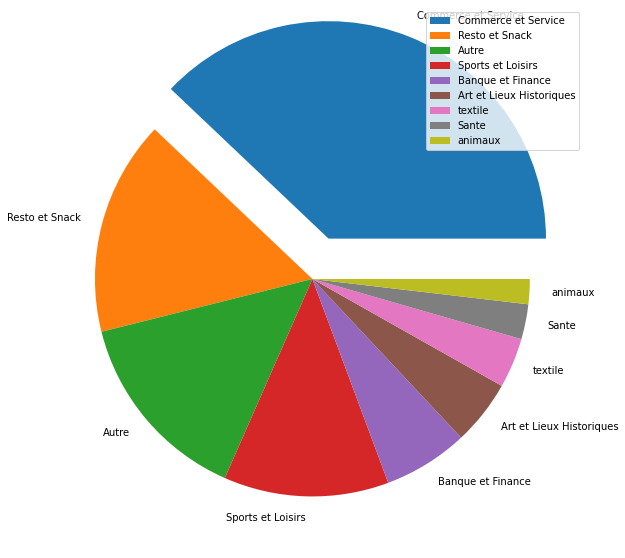

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(12,10))
myexplode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0]
labels = ['Commerce et Service','Resto et Snack', 'Autre', 'Sports et Loisirs', 'Banque et Finance', 'Art et Lieux Historiques', 'textile', 'Sante', 'animaux']
plt.pie(df2['directory_category'].value_counts(), explode=myexplode, labels=labels)
plt.legend()
plt.show()
plt.savefig("img/type_offre2.png")

In [22]:
#fill an empty value in location_address__street
df2.iloc[195, 2] = "chimay"

In [23]:
df2.sample(10)

,directory_category,post_content,location_address__street,location_address__city,location_address__address,location_address__lat,location_address__term_id,location_address__lng,location_address__zip,post_title,field_phone,field_social_accounts__facebook,field_website
246,Sante,Description à venir,bld louise 18,chimay,"Boulevard Louise 18, 6460 Chimay, Belgique",50.044836,chimay,4.310034,6460.0,Hôpital de Chimay (CSF),060218811,A venir,A venir
57,Sports et Loisirs,Description à venir,"Chée de Couvin, 96",chimay,"Chée de Couvin, 96, 6460 CHIMAY",50.045348,chimay,4.327377,6460.0,Comptoir Automobile S.A.,060/21 13 92,A venir,A venir
98,Commerce et Service,"Morphocoiffure dame, homme, enfant\r\n\r\nColo...",Rue Rogier 7,chimay,"Rue Rogier 7, 6460 CHIMAY",50.049339,chimay,4.316832,6460.0,Greg Coiffure,060/21 55 95,https://www.facebook.com/gregcoiffure/,A venir
65,Commerce et Service,Description à venir,"Route Charlemagne, 5b",baileux,"Route Charlemagne, 5b, 6464 BAILEUX",50.035979,baileux,4.375386,6464.0,Discobeer,060/21 12 99,https://www.facebook.com/Discobeer-Riches-P%C3...,https://www.discobeer.be
117,Resto et Snack,Description à venir,"Place Léopold, 7",chimay,"Place Léopold, 7, 6460 CHIMAY",50.047093,chimay,4.318598,6460.0,La Malterie,060/21 32 30,https://www.facebook.com/lamalteriechimay/,A venir
15,Commerce et Service,Description à venir,"Grand Place, 33",chimay,"Grand Place, 33, 6460 CHIMAY",50.048967,chimay,4.315641,6460.0,Au Parfum Des Sens,060/21 26 66,https://www.facebook.com/Au-parfum-des-sens-15...,http://www.parfumdessens.be/
22,Banque et Finance,Description à venir,Rue de Bourlers 68,chimay,"Rue de Bourlers 68, 6460 CHIMAY",50.042419,chimay,4.327304,6460.0,Axa Banque,060/21 51 25,A venir,A venir
5,Autre,Description à venir,"Chée de Couvin, 95",chimay,"Chée de Couvin, 95, 6460 CHIMAY",50.044725,chimay,4.331689,6460.0,Afflelou,060/21 93 40,https://www.facebook.com/alainafflelouchimay,A venir
197,Resto et Snack,Description à venir,GRand rue 14,chimay,"GRand rue 14, 6460 Chimay",50.048770,chimay,4.314314,6460.0,Sushimay,0477/062040,https://www.facebook.com/sushimay13/,https://info@sushichimay.be
9,Commerce et Service,Description à venir,"Place Chapitre, 5b",chimay,"Place Chapître, 5b, 6460 CHIMAY",50.049597,chimay,4.316536,6460.0,Appolin'Hair,060/21 21 40,https://www.facebook.com/apollinhair/,A venir


In [24]:
df2.to_csv(r'cleaned_data/data_wp.csv', index=False)

In [32]:
#Create the Map
map_osm = folium.Map(
    location = [50.01588, 4.37243,],
    zoom_start = 10
)
map_osm

#You Markler the point in Map
for indice, row in df2.iterrows():
    folium.Marker(
        location=[row["location_address__lat"], row["location_address__lng"]],
        popup=row['post_title'],
        icon=folium.map.Icon(color='yellow')
    ).add_to(map_osm)
map_osm.save('maps/map_wp.html')
map_osm